In [91]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [93]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train_flower',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=35,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8069 files belonging to 7 classes.


In [67]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [95]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'val_flower',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=35,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2306 files belonging to 7 classes.


In [75]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

### Building Model

In [97]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [99]:
cnn = Sequential()

In [12]:
## Building Convolution layer

In [101]:
cnn.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [103]:
cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [105]:
cnn.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [107]:
cnn.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [109]:
cnn.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [111]:
cnn.add(tf.keras.layers.Dropout(0.15))

In [113]:
cnn.add(Flatten())

In [115]:
cnn.add(Dense(units=1400,activation='relu'))

In [117]:
cnn.add(tf.keras.layers.Dropout(0.30)) #To avoid overfitting

In [119]:
## Output layer
cnn.add(Dense(units=7,activation='softmax'))

### Compiling Model

In [121]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [123]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1400)                │       2,868,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           9,807 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,590,631 (28.96 MB)

 Trainable params: 7,590,631 (28.96 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=7)

Epoch 1/7
231/231 ━━━━━━━━━━━━━━━━━━━━ 172s 732ms/step - accuracy: 0.5108 - loss: 1.3311 - val_accuracy: 0.7485 - val_loss: 0.7140
Epoch 2/7
231/231 ━━━━━━━━━━━━━━━━━━━━ 181s 782ms/step - accuracy: 0.7621 - loss: 0.6748 - val_accuracy: 0.8270 - val_loss: 0.5108
Epoch 3/7
231/231 ━━━━━━━━━━━━━━━━━━━━ 196s 849ms/step - accuracy: 0.8294 - loss: 0.5018 - val_accuracy: 0.8356 - val_loss: 0.4803
Epoch 4/7
231/231 ━━━━━━━━━━━━━━━━━━━━ 199s 859ms/step - accuracy: 0.8702 - loss: 0.3749 - val_accuracy: 0.8716 - val_loss: 0.3692
Epoch 5/7
231/231 ━━━━━━━━━━━━━━━━━━━━ 206s 892ms/step - accuracy: 0.9104 - loss: 0.2782 - val_accuracy: 0.8816 - val_loss: 0.3491
Epoch 6/7
231/231 ━━━━━━━━━━━━━━━━━━━━ 192s 830ms/step - accuracy: 0.9205 - loss: 0.2311 - val_accuracy: 0.8703 - val_loss: 0.4083
Epoch 7/7
231/231 ━━━━━━━━━━━━━━━━━━━━ 188s 813ms/step - accuracy: 0.9438 - loss: 0.1620 - val_accuracy: 0.9037 - val_loss: 0.3110


## Evaluating Model

In [128]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

231/231 ━━━━━━━━━━━━━━━━━━━━ 46s 200ms/step - accuracy: 0.9768 - loss: 0.0841
Training accuracy: 0.9768248796463013


In [130]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.9058 - loss: 0.3167
Validation accuracy: 0.9037293791770935


## Saving Model

In [135]:
cnn.save('trained_flowers_model.keras')

In [137]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6267195343971252,
  0.7821291089057922,
  0.8392613530158997,
  0.8770603537559509,
  0.9133721590042114,
  0.9258891940116882,
  0.9468335509300232],
 'loss': [1.0189502239227295,
  0.6228405237197876,
  0.4715699851512909,
  0.3570226728916168,
  0.26767632365226746,
  0.21811899542808533,
  0.16069269180297852],
 'val_accuracy': [0.7484822273254395,
  0.8269731402397156,
  0.8356461524963379,
  0.8716391921043396,
  0.8816131949424744,
  0.8703382611274719,
  0.9037293791770935],
 'val_loss': [0.7140082716941833,
  0.5108089447021484,
  0.48034319281578064,
  0.36920517683029175,
  0.3491327464580536,
  0.40828248858451843,
  0.31100183725357056]}

In [139]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [141]:
print(training_history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

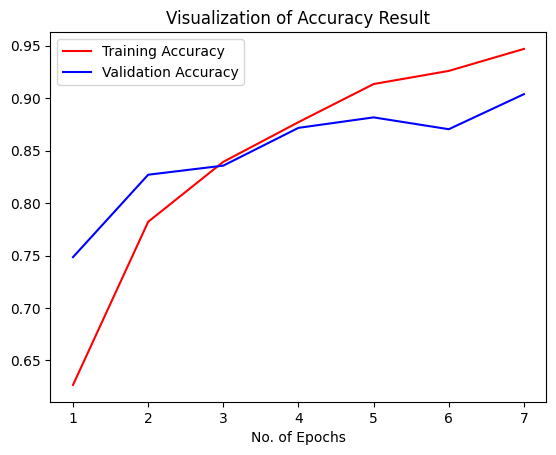

In [143]:
epochs = [i for i in range(1,8)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [147]:
class_name = validation_set.class_names

In [149]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test_flower',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1156 files belonging to 7 classes.


In [151]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1156/1156 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step


In [153]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [155]:
Y_true

<tf.Tensor: shape=(1156,), dtype=int64, numpy=array([0, 0, 0, ..., 6, 6, 6], dtype=int64)>

In [157]:
predicted_categories

<tf.Tensor: shape=(1156,), dtype=int64, numpy=array([0, 0, 0, ..., 1, 6, 6], dtype=int64)>

In [159]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [161]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

       daisy       0.99      0.90      0.94       176
   dandelion       0.94      0.95      0.94       150
        lily       0.86      0.93      0.89       162
      orchid       0.85      0.91      0.88       186
        rose       0.87      0.75      0.81       149
   sunflower       0.93      0.99      0.96       172
       tulip       0.87      0.86      0.86       161

    accuracy                           0.90      1156
   macro avg       0.90      0.90      0.90      1156
weighted avg       0.90      0.90      0.90      1156



## Confusion Matrix Visualization

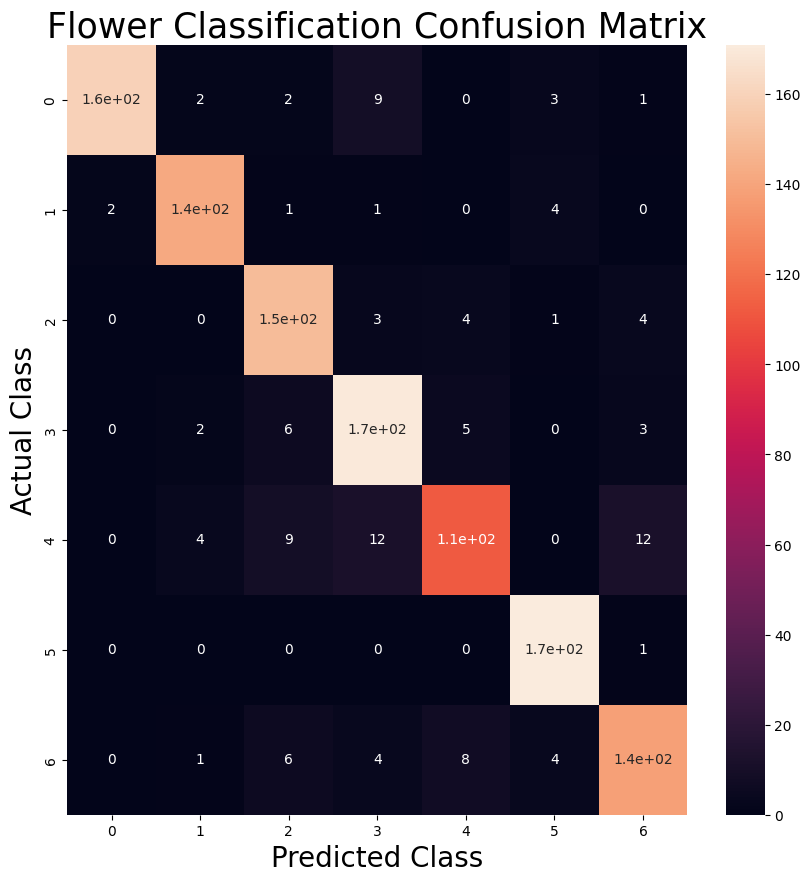

In [178]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Flower Classification Confusion Matrix',fontsize = 25)
plt.show()

## Prediction on Test Data

### Importing Libraries

In [184]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Test set Image Processing


In [246]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test_flower',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = test_set.class_names
print(class_name)

Found 1156 files belonging to 7 classes.
['daisy', 'dandelion', 'lily', 'orchid', 'rose', 'sunflower', 'tulip']


## Loading Model

In [248]:
cnn = tf.keras.models.load_model('trained_flowers_model.keras')

## Visualising and Performing Prediction on Single image

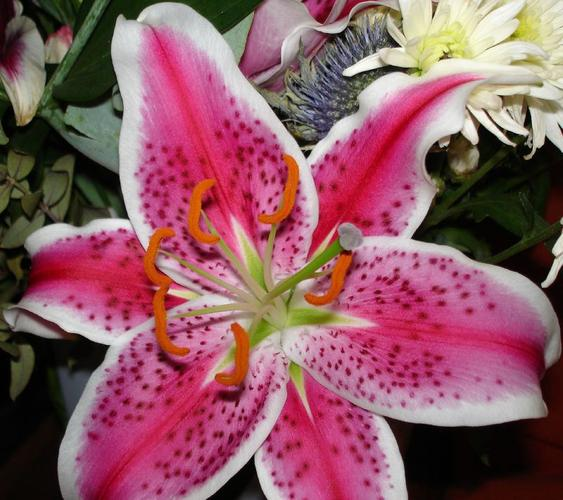

In [252]:
#Test Image Visualization
from IPython.display import display
from PIL import Image


path="test_flower/lily/95892044_726f97a5ce_o.jpg"
img = Image.open(path)
display(img)

## Testing Model

In [254]:
image = tf.keras.preprocessing.image.load_img(path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


In [256]:
print(predictions)

[[2.3819739e-04 1.9191111e-06 8.0466223e-01 1.9037564e-01 4.7110696e-03
  3.5624435e-06 7.4014119e-06]]


In [258]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


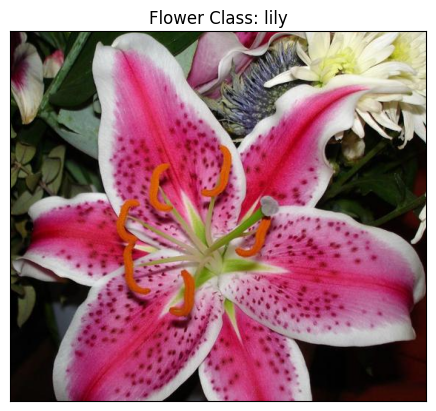

In [260]:
# Displaying the flower class prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Flower Class: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()